# **Efecto del material interestelar**

**Resumen**

La radiación estelar sufre cambios al interactuar con el material interestelar que se encuentra entre la fuente y el observador. La extinción de la luz, producida por absorciones y dispersiones en el medio, es un efecto que depende de la longitud de onda, y como consecuencia de estos cambios en el espectro estelar, los índices de color de las estrellas se enrojecen, a la vez que disminuye el brillo estelar observado. El objetivo de esta práctica es familiarizarse con estos efectos a través de ejercicios con datos reales que obtendremos de bases de datos astronómicas.

#### Ejercicio 1.

Describa cualitativamente los distintos ambientes en los que se encuentra el material interestelar, y qué efectos tiene sobre la radiación que recibimos de las estrellas.

#### Ejercicio 2.

Dadas las siguientes 6 estrellas en la región de Cygnus, calcule la distancia a cada una de ellas en
parsecs:

HD 228452
HD 192557
HD 192605
TYC 2684-1684-1
HD 192164
HD 228119

Proceda de la siguiente forma:

(a) Busque las estrellas por identificador. Obtenga el tipo espectral y las magnitudes aparentes ($m_V$ y $m_B$) de la base de datos de Simbad (http://simbad.u-strasbg.fr/simbad/sim-fid).

Pero también con python:

In [81]:
from astroquery.simbad import Simbad
# Para saber qué podemos "consultar"
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

bibcodelist(y1-y2)
biblio
cel
cl.g
coo(opt)
coo_bibcode
coo_err_angle
coo_err_maja
coo_err_mina
coo_qual
coo_wavelength
coordinates
dec(opt)
dec_prec
diameter
dim
dim_angle
dim_bibcode
dim_incl
dim_majaxis
dim_minaxis
dim_qual
dim_wavelength
dimensions
distance
distance_result
einstein
fe_h
flux(filtername)
flux_bibcode(filtername)
flux_error(filtername)
flux_name(filtername)
flux_qual(filtername)
flux_system(filtername)
flux_unit(filtername)
fluxdata(filtername)

In [97]:
from astroquery.simbad import Simbad
customSimbad = Simbad()
customSimbad.add_votable_fields('ra', 'dec','sptype','sp_bibcode','flux(B)','flux(V)','flux_bibcode(B)', 'flux_bibcode(V)') #,'parallax')
result_table = customSimbad.query_objects(["HD 228452", "HD 192557", "HD 192605","TYC 2684-1684-1","HD 192164","HD 228119"])
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,RA_2,DEC_2,SP_TYPE,SP_QUAL,SP_BIBCODE,SP_BIBCODE_2,FLUX_B,FLUX_V,FLUX_BIBCODE_B,FLUX_BIBCODE_V
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,"""h:m:s""","""d:m:s""",,,,,mag,mag,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,str13,str13,object,str1,object,object,float32,float32,object,object
HD 5980,00 59 26.5847,-72 09 53.927,14,14,0.045,0.031,90,A,O,2018yCat.1345....0G,00 59 26.5847,-72 09 53.927,WN4+O7I:,C,1982ApJ...257..116B,1982ApJ...257..116B,11.13,11.31,2000A&A...355L..27H,2000A&A...355L..27H
HD 192557,20 14 13.9296,+35 21 42.012,14,14,0.022,0.027,90,A,O,2018yCat.1345....0G,20 14 13.9296,+35 21 42.012,F6V,C,,,8.08,7.59,,
HD 192605,20 14 25.2415,+35 37 20.339,14,14,0.027,0.033,90,A,O,2018yCat.1345....0G,20 14 25.2415,+35 37 20.339,B9V,C,,,8.68,8.71,,
TYC 2684-1684-1,20 16 28.1923,+35 45 49.569,14,14,0.021,0.026,90,A,O,2018yCat.1345....0G,20 16 28.1923,+35 45 49.569,G2V,D,,,11.62,10.92,2000A&A...355L..27H,2000A&A...355L..27H
HD 192164,20 12 18.3068,+34 51 10.696,14,14,0.020,0.024,90,A,O,2018yCat.1345....0G,20 12 18.3068,+34 51 10.696,K2V,C,,,9.29,7.8,,
HD 228119,20 10 47.9429,+35 08 05.943,14,14,0.023,0.030,90,A,O,2018yCat.1345....0G,20 10 47.9429,+35 08 05.943,A3V,C,,,9.904,9.758,2000A&A...355L..27H,2000A&A...355L..27H


In [98]:
#Ver resultados de otra manera
print(result_table['MAIN_ID','SP_TYPE','FLUX_B','FLUX_V'])

    MAIN_ID     SP_TYPE  FLUX_B FLUX_V
                          mag    mag  
--------------- -------- ------ ------
      HD   5980 WN4+O7I:  11.13  11.31
      HD 192557      F6V   8.08   7.59
      HD 192605      B9V   8.68   8.71
TYC 2684-1684-1      G2V  11.62  10.92
      HD 192164      K2V   9.29    7.8
      HD 228119      A3V  9.904  9.758


(b) Obtenga las magnitudes absolutas $M_V$ y el índice de color intrínseco ($B−V$) para cada estrella, según su tipo espectral de Cox (2000, ver Tabla 15.7).

Link: http://astronomiaestelarlp.pbworks.com/w/file/109924168/Allen%27s%20Astrophysical%20Quantities%20%284th%20Ed%29%20-%20Cox%2C%20A.N.%20%28ed.%29%20-%20Springer%20-%202001%20-%20ISBN%2097803879518.pdf


In [84]:
#Para poder operar entre columnas y calcular las distancias espectrofotométricas. Agrego columnas:
# Por ejemplo la magnitud intrínseca V
# busco los valores en Cox y los agrego
result_table['MV'] = [ -2.45, 3.5, -0.25, 4.7, 6.4, 1.3 ]
#
# Les dejamos a Uds. completar los índices de color
result_table['(B-V)0'] = [ -0.24, 0.44, -0.11, 0.63, 0.91, 0.05 ] ### BORRAR
print(result_table['MAIN_ID','SP_TYPE','FLUX_B','FLUX_V','MV','(B-V)0'])

    MAIN_ID     SP_TYPE FLUX_B FLUX_V   MV  (B-V)0
                         mag    mag               
--------------- ------- ------ ------ ----- ------
      HD 228452     B3V  10.43   9.77 -2.45  -0.24
      HD 192557     F6V   8.08   7.59   3.5   0.44
      HD 192605     B9V   8.68   8.71 -0.25  -0.11
TYC 2684-1684-1     G2V  11.62  10.92   4.7   0.63
      HD 192164     K2V   9.29    7.8   6.4   0.91
      HD 228119     A3V  9.904  9.758   1.3   0.05


(c) Deduzca el exceso de color $E(B−V)$ para cada estrella.

(d) Suponiendo que la extinción interestelar en la banda $V$, expresada en magnitudes, sigue la relación:

$A_V = R  E(B−V)$,

calcule el valor de la extinción para cada estrella.
Utilice el valor canónico para R (R = 3.1).

(e) Calcule la distancia a cada estrella en parsecs. Utilice la fórmula del módulo de distancia:

$V − M_V = −5 + 5 \log(d) + A_V$ .

In [85]:
# Calculo distancias espectrofotométricas
import numpy as np
result_table['B-V'] = result_table['FLUX_B'] - result_table['FLUX_V']
result_table['AV'] = 3.1*(result_table['B-V']-result_table['(B-V)0'])
result_table['distancia_sp'] = np.power(10,(result_table['FLUX_V']-result_table['MV']+5-result_table['AV'])/5.0)
print(result_table['MAIN_ID','SP_TYPE','distancia_sp'])

    MAIN_ID     SP_TYPE    distancia_sp   
--------------- ------- ------------------
      HD 228452     B3V  769.1307699689481
      HD 192557     F6V   61.2350634841191
      HD 192605     B9V   552.585954685622
TYC 2684-1684-1     G2V 158.70848044655418
      HD 192164     K2V   8.32530551907172
      HD 228119     A3V 428.62759903791266


(f) Compare las distancias calculadas con las determinadas a partir de las paralajes de Gaia. Comente cuáles pueden ser las causas de las diferencias. 

In [86]:
# Comparo las distancias calculadas con las determinadas a partir de paralajes Gaia
customSimbad.add_votable_fields('distance')
d_table = customSimbad.query_objects(["HD 228452", "HD 192557", "HD 192605","TYC 2684-1684-1","HD 192164","HD 228119"])
d_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,RA_2,DEC_2,SP_TYPE,SP_QUAL,SP_BIBCODE,SP_BIBCODE_2,FLUX_B,FLUX_V,FLUX_BIBCODE_B,FLUX_BIBCODE_V,Distance_distance,Distance_Q,Distance_unit,Distance_merr,Distance_perr,Distance_method,Distance_bibcode
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,"""h:m:s""","""d:m:s""",,,,,mag,mag,,,,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,str13,str13,object,str1,object,object,float32,float32,object,object,float64,str1,str4,float64,float64,str8,str19
HD 228452,20 13 57.4648,+35 24 11.048,14,14,0.020,0.029,90,A,O,2018yCat.1345....0G,20 13 57.4648,+35 24 11.048,B3V,C,,,10.43,9.77,,,1957.7134,,pc,-110.7633,110.7633,paral,2018yCat.1345....0G
HD 192557,20 14 13.9296,+35 21 42.012,14,14,0.022,0.027,90,A,O,2018yCat.1345....0G,20 14 13.9296,+35 21 42.012,F6V,C,,,8.08,7.59,,,58.4221,,pc,-0.1048,0.1048,paral,2018yCat.1345....0G
HD 192605,20 14 25.2415,+35 37 20.339,14,14,0.027,0.033,90,A,O,2018yCat.1345....0G,20 14 25.2415,+35 37 20.339,B9V,C,,,8.68,8.71,,,333.4334,,pc,-4.3026,4.3026,paral,2018yCat.1345....0G
TYC 2684-1684-1,20 16 28.1923,+35 45 49.569,14,14,0.021,0.026,90,A,O,2018yCat.1345....0G,20 16 28.1923,+35 45 49.569,G2V,D,,,11.62,10.92,2000A&A...355L..27H,2000A&A...355L..27H,134.9801,,pc,-0.5211,0.5211,paral,2018yCat.1345....0G
HD 192164,20 12 18.3068,+34 51 10.696,14,14,0.020,0.024,90,A,O,2018yCat.1345....0G,20 12 18.3068,+34 51 10.696,K2V,C,,,9.29,7.8,,,416.3197,,pc,-4.9223,4.9223,paral,2018yCat.1345....0G
HD 228119,20 10 47.9429,+35 08 05.943,14,14,0.023,0.030,90,A,O,2018yCat.1345....0G,20 10 47.9429,+35 08 05.943,A3V,C,,,9.904,9.758,2000A&A...355L..27H,2000A&A...355L..27H,324.4331,,pc,-3.6103,3.6103,paral,2018yCat.1345....0G


In [87]:
print(d_table['MAIN_ID','Distance_distance'])
print(result_table['MAIN_ID','SP_TYPE','distancia_sp'])

    MAIN_ID     Distance_distance
--------------- -----------------
      HD 228452         1957.7134
      HD 192557           58.4221
      HD 192605          333.4334
TYC 2684-1684-1          134.9801
      HD 192164          416.3197
      HD 228119          324.4331
    MAIN_ID     SP_TYPE    distancia_sp   
--------------- ------- ------------------
      HD 228452     B3V  769.1307699689481
      HD 192557     F6V   61.2350634841191
      HD 192605     B9V   552.585954685622
TYC 2684-1684-1     G2V 158.70848044655418
      HD 192164     K2V   8.32530551907172
      HD 228119     A3V 428.62759903791266


(g) Grafique en un diagrama color-magnitud las magnitudes y colores intrínsecos y observados. Indique con un vector cómo se desplazan las estrellas en dicho diagrama por efecto de la extinción interestelar (extinción y enrojecimiento).

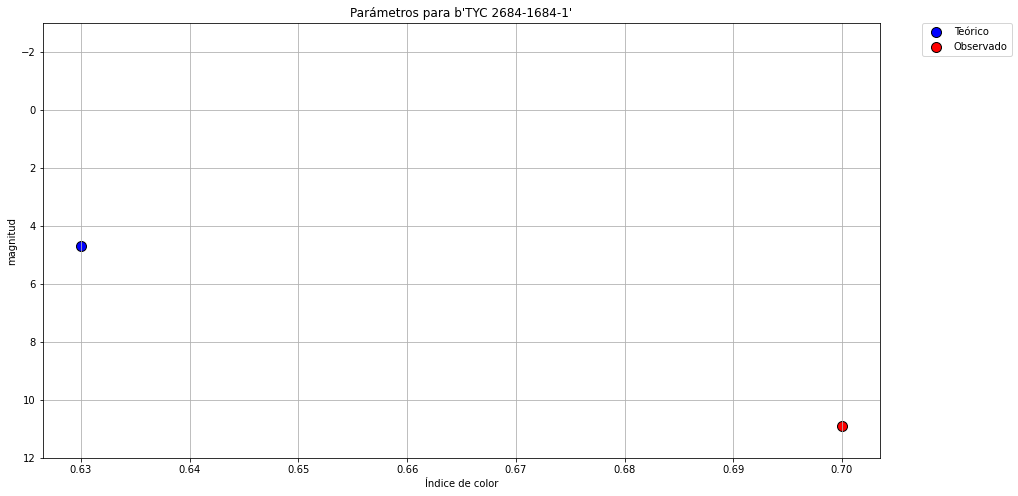

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

#estrella = result_table[result_table['SP_TYPE']=="B3V"]
estrella = pd.DataFrame()
estrella['(B-V)0'] = result_table['(B-V)0']
estrella['MV'] = result_table['MV']
estrella['B-V'] = result_table['B-V']
estrella['FLUX_V'] = result_table['FLUX_V']
estrella['MAIN_ID'] = result_table['MAIN_ID']
estrella0 = estrella.iloc[3,:]
plt.scatter(data=estrella0, x='(B-V)0', y='MV',alpha=1, edgecolors='black', c='blue', s=100, label='Teórico')
plt.scatter(data=estrella0, x='B-V', y='FLUX_V',alpha=1, edgecolors='black', c='red', s=100, label='Observado')
plt.grid(True)
plt.ylim(12, -3)
plt.xlabel('Índice de color')
plt.ylabel('magnitud')
plt.title('Parámetros para %s' %(estrella0['MAIN_ID']))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Ejercicio 3.

El medio interestelar actúa selectivamente sobre las longitudes de onda, cambiando el aspecto de la distribución espectral de energía SED (spectral energy distribution) de las estrellas. Todas las estrellas de un subtipo espectral tendrán los mismos índices de color intrínsecos ya que tienen la misma SED. Las diferencias de colores aparentes entre estrellas del mismo subtipo espectral son causadas por el medio interestelar. Para caracterizar el medio interestelar, conviene observar estrellas intrínsecamente brillantes, que son detectadas aún a grandes distancias.

(a) Seleccionaremos un conjunto de estrellas O4 y O5 de la base de datos SIMBAD (http://simbad.u-strasbg.fr/simbad/sim-fsam), que tengan medidas de las magnitudes $U$, $B$ y $V$. Escribimos en el casillero de los requerimientos:

sptypes = "O4" & Umag > 1 & Bmag > 1 & Vmag > 1 | sptypes = "O5" & Umag > 1 & Bmag > 1 & Vmag > 1

Esto es: Estrellas O4 con Umag, Bmag y Vmag distinto de cero (>1) o (|) estrellas O5 con Umag, Bmag y Vmag distinto de cero.

Para que nos dé la lista de objetos, seleccionamos a la derecha de la página: “display objects”. Antes, configuramos el formato de la tabla de salida. Para eso, en “Output options” (se abre en pestaña nueva), modificamos la columna que
dice “list display”. Sólo cliqueamos Fluxes/Magnitudes (y ahí U B V), y Spectral type. Todos los demás deben quedar sin cliquear. Pedimos además que el “Output format” sea ascii-tab separator. Guardamos el archivo de salida para hacer el gráfico correspondiente.

Pero también podemos hacerlo con Python:

In [9]:
from astroquery.simbad import Simbad
customSimbad = Simbad()
customSimbad.add_votable_fields('flux(U)', 'flux(B)','flux(V)','sptype')
result = customSimbad.query_criteria('sptypes="O4V" & Umag>1 & Bmag>1 & Vmag>1 | sptypes="O5V" & Umag>1 & Bmag>1 & Vmag>1')
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_U,FLUX_B,FLUX_V,SP_TYPE,SP_QUAL,SP_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,object,str1,object
V* V441 Pup,07 28 53.5787,-26 06 28.895,14,14,0.023,0.031,90,A,O,2018yCat.1345....0G,11.27,12.29,11.83,O5Ve,C,2016ApJS..224....4M
[MWP96] 189,01 33 33.75,+30 41 32.7,6,6,--,--,0,D,,1996AJ....111.1128M,20.82,22.46,21.97,O5V,C,2009ApJ...700.1847L
2MASS J05385364-6908116,05 38 53.641,-69 08 11.64,7,7,210.000,160.000,178,C,I,2003yCat.2246....0C,14.927,15.746,15.725,O5V,C,1999A&AS..137...21B
[MLD95] LMC 1-550,05 31 11.854,-71 04 10.10,7,7,110.000,110.000,90,C,I,2003yCat.2246....0C,12.207,12.941,13.231,O5V,C,2012A&A...547A..19K
SK -71 51,05 41 39.6169,-71 19 56.313,14,14,0.034,0.038,90,A,O,2018yCat.1345....0G,11.621,12.62,12.71,O4V,C,1986AJ.....92...48C
SK -70 60,05 04 40.7778,-70 15 34.500,14,14,0.032,0.034,90,A,O,2018yCat.1345....0G,12.609,13.646,13.914,O4V,C,1986AJ.....92...48C
AzV 388,01 05 39.5300,-72 29 26.938,14,14,0.038,0.028,90,A,O,2018yCat.1345....0G,12.79,13.86,14.12,O5V,C,2004MNRAS.353..601E
AzV 177,00 56 44.1039,-72 03 31.678,14,14,0.048,0.031,90,A,O,2018yCat.1345....0G,13.22,14.39,14.62,O4Vz,C,2013ApJ...763..101L


(b) Realizamos un gráfico color-color de las estrellas de la muestra ($B−V$) versus ($U−B$). Agregamos
una secuencia principal de edad cero (ZAMS) y comentamos el resultado.

(c) Ajustamos la recta de enrojecimiento a partir de las estrellas de la muestra obtenida, encontrando el valor de la pendiente en la siguiente expresión:

$(U − B) = a (B − V) + b$

          ub        bv
0  -1.020000  0.460000
1  -1.639999  0.490000
2  -0.819000  0.021000
3  -0.734000 -0.290000
4  -0.999000 -0.090000
5  -1.037000 -0.268000
6  -1.070000 -0.260000
7  -1.170000 -0.230000
8  -0.190000  1.059999
9  -0.170000  0.860000
10 -0.159000  1.606001
11 -0.307000  1.411000
12 -0.239000  1.485001
13 -0.115000  1.776000


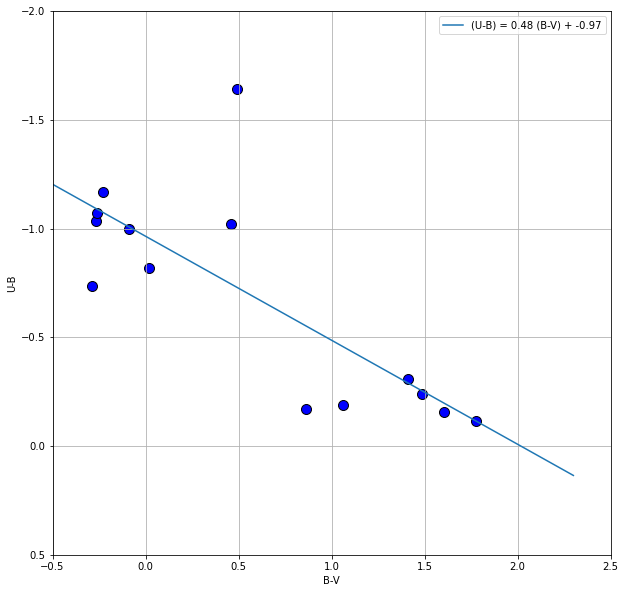

In [58]:
import numpy as np
plt.rcParams['figure.figsize'] = [10, 10]

#Para plotear convierto a pandas
ubv =pd.DataFrame()
ubv['ub']=result['FLUX_U']-result['FLUX_B']
ubv['bv']=result['FLUX_B']-result['FLUX_V']
print(ubv)
#
plt.scatter(data=ubv, x='bv', y='ub',alpha=1, edgecolors='black', c='blue', s=100, label='')
#
# Ajusto polinomio de grado 1  
z = np.polyfit(x=ubv['bv'], y=ubv['ub'], deg=1)
x = np.arange(-0.5,2.5,0.2)
y = x * z[0] + z[1]
plt.plot(x, y, label='(U-B) = %.2f (B-V) + %.2f' %(z[0],z[1]))
plt.grid(True)
plt.ylim(0.5,-2)
plt.xlim(-0.5,2.5)
plt.xlabel('B-V')
plt.ylabel('U-B')
plt.legend()
#
plt.show()

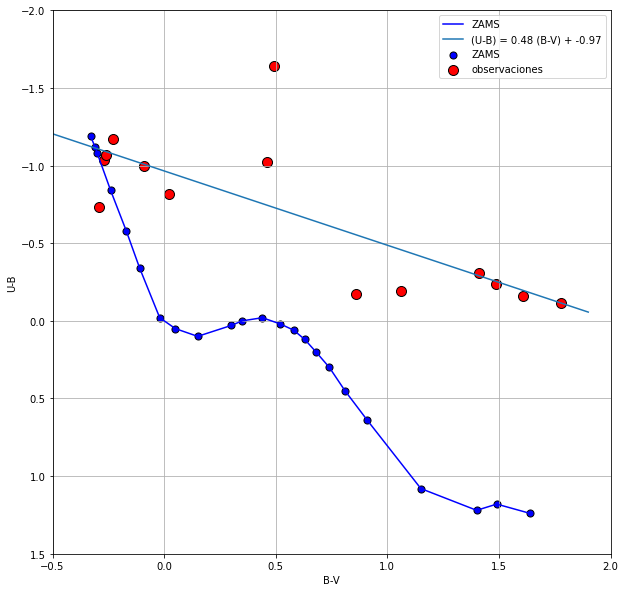

In [57]:
import io
plt.rcParams['figure.figsize'] = [10, 10]

#Agrego ZAMS
zams = pd.read_csv('ZAMS.csv',header=0)
#print (zams)
zams.plot.line(x='B-V', y='U-B', color='blue', label='ZAMS') #línea
plt.scatter(data=zams, x='B-V', y='U-B', alpha=1, edgecolors='black', c='blue', s=50, label='ZAMS') #puntos
#
plt.scatter(data=ubv, x='bv', y='ub', alpha=1, edgecolors='black', c='red', s=100, label='observaciones')
#
# Ajusto polinomio de grado 1  
z = np.polyfit(x=ubv['bv'], y=ubv['ub'], deg=1)
x = np.arange(-0.5,2,0.2)
y = x * z[0] + z[1]
plt.plot(x, y, label='(U-B) = %.2f (B-V) + %.2f' %(z[0],z[1]))
plt.grid(True)
plt.ylim(1.5,-2)
plt.xlim(-0.5,2)
plt.xlabel('B-V')
plt.ylabel('U-B')
plt.legend()
#
plt.show()

#### Ejercicio 4.

Podemos visualizar que la extinción que ejerce el medio interestelar sobre la radiación de las estrellas depende de la longitud de onda.

(a) Elija la estrella más extinguida de la lista anterior. 

(b) Obtenga (de Simbad) sus flujos en la mayor cantidad de filtros fotométricos posible.

(c) Busque las magnitudes absolutas calibradas para una estrella con el mismo tipo espectral.

(d) Diluya la magnitud absoluta por la distancia a dicha estrella.

(e) Compare las magnitudes corregidas por distancia y observada.

Comente: ¿Por qué las magnitudes comparadas no son iguales?¿Se verifica una dependencia con la longitud de onda?¿Qué pasaría si trato de determinar una temperatura con las magnitudes observadas?

In [65]:
from astroquery.simbad import Simbad
customSimbad = Simbad()
customSimbad.add_votable_fields('sptype','sp_bibcode','flux(U)','flux(B)','flux(V)','flux(R)','flux(I)','flux(J)','flux(H)','flux(K)') #,'parallax')
result_table = customSimbad.query_object("Cl* Westerlund 2 MSP 165")
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SP_TYPE,SP_QUAL,SP_BIBCODE,SP_BIBCODE_2,FLUX_U,FLUX_B,FLUX_V,FLUX_R,FLUX_I,FLUX_J,FLUX_H,FLUX_K
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,str1,object,object,float32,float32,float32,float32,float32,float32,float32,float32
Cl* Westerlund 2 MSP 165,10 23 55.1750,-57 45 26.927,14,14,0.043,0.041,90,A,O,2018yCat.1345....0G,O4V,C,2013AJ....145..125V,2013AJ....145..125V,17.271,17.386,15.61,14.98,13.153,10.961,10.258,9.857


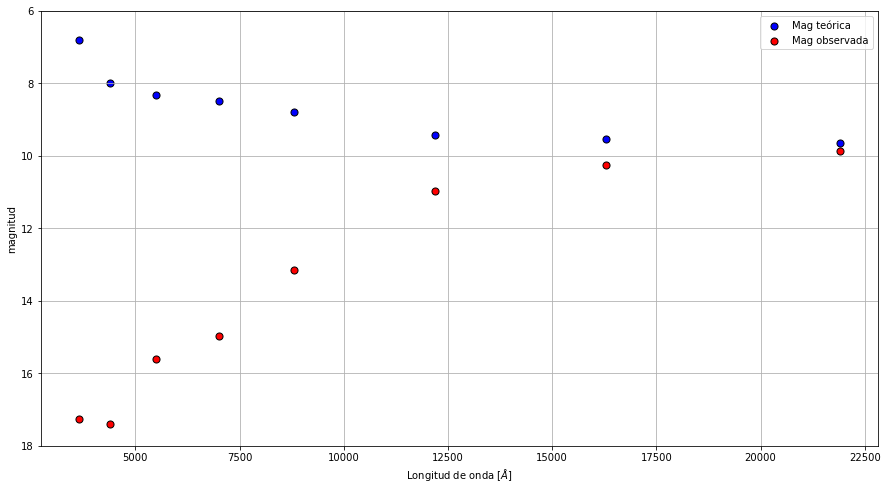

In [79]:
# Para generar las comparaciones, ingreso "a mano" la base de datos "sed" 
sed =pd.DataFrame()
sed['lambda'] = [3650,4400,5500,7000,8800,12200,16300,21900]
sed['M_abs'] = [-7.22,-6.03,-5.7,-5.55,-5.23,-4.60,-4.49,-4.39]
distancia = 6400.0 # Borrar, buscar en Simbad.
sed['m_corr'] = sed['M_abs'] - 5 + 5 * np.log10(distancia)
sed['m_obs'] = [17.271,17.386,15.61,14.98,13.153,10.961,10.258,9.857]

# Ploteamos
plt.rcParams['figure.figsize'] = [15, 8]

plt.scatter(data=sed, x='lambda', y='m_corr', alpha=1, edgecolors='black', c='blue', s=50, label='Mag teórica') #puntos
plt.scatter(data=sed, x='lambda', y='m_obs', alpha=1, edgecolors='black', c='red', s=50, label='Mag observada') #puntos
plt.grid(True)
plt.ylim(18,6)
#plt.xlim()
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('magnitud')
plt.legend()
#
plt.show()